In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [37]:
df_tpu = pd.read_excel("TPU/TPU_PAdataset.xlsx", header = 1)
df_tpu_covid = pd.read_excel("TPU/TPU_covid.xlsx", header = 1)
df_covid_case = pd.read_excel("TPU/Master_COVID_case.xlsx")
df_valid = pd.read_csv('/Users/jzhizhi/Desktop/Workspace/d_valid.csv',index_col=0)

In [40]:
k = df_tpu[df_tpu['Name'].isin(df_valid['name'])]
kk = k.dropna(axis=0,subset=['TPU'])
print(len(kk))

394


In [60]:
kkk = kk.drop_duplicates(subset = ['TPU'],keep='first')
kkk.drop(['Name','Address'],axis=1,inplace=True)

/var/folders/9h/gncgqhld0_n2xwdvsytt6nvh0000gn/T/ipykernel_23085/1590789386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kkk.drop(['Name','Address'],axis=1,inplace=True)


In [71]:
kk = kk.groupby('TPU').count()
kk = kk.reset_index()
kk = kk[['TPU','Name']]
k_merge = pd.merge(kkk,kk,how='outer',on='TPU')
k_merge = k_merge.rename(columns={'Name':'count'})

In [95]:
k_merge.to_csv('TPU/PAdataset_TPU_count.csv')

In [121]:
def kendall_pval(x,y):
    return stats.kendalltau(x,y)[1]
    
def pearsonr_pval(x,y):
    return stats.pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return stats.spearmanr(x,y)[1]

In [122]:
p_value = k_merge.corr(method=pearsonr_pval)

In [126]:
k_merge['count'].sum()

394

<AxesSubplot:>

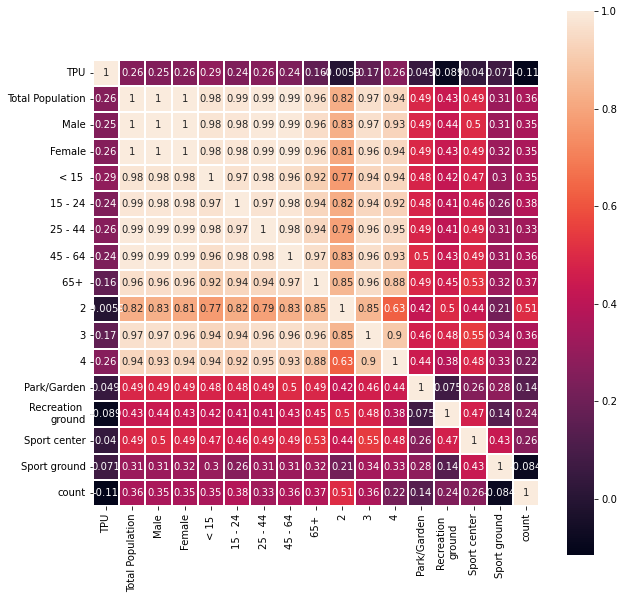

In [124]:
plt.figure(figsize=(10, 10))
sns.heatmap(k_merge.corr(method='spearman'), linewidths=0.1, vmax=1.0, square=True, linecolor='white',annot=True)

In [128]:
k_merge['count'].describe()

count    66.000000
mean      5.969697
std       8.653980
min       1.000000
25%       1.000000
50%       3.000000
75%       5.750000
max      46.000000
Name: count, dtype: float64

In [132]:
temp1 = df_tpu_covid.drop_duplicates(subset = ['TPU'],keep='first')
temp2 = df_tpu_covid.groupby('TPU').count()

In [139]:
temp1.drop(['Case no.','Address'],axis=1,inplace=True)

/var/folders/9h/gncgqhld0_n2xwdvsytt6nvh0000gn/T/ipykernel_23085/1387169213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1.drop(['Case no.','Address'],axis=1,inplace=True)


In [ ]:
temp2 = temp2.reset_index()
temp2 = temp2[['TPU','Case no.']]

In [140]:
temp_merge = pd.merge(temp1,temp2,how='outer',on='TPU')
temp_merge = temp_merge.rename(columns={'Case no.':'count'})

In [144]:
temp_merge[temp_merge['TPU']==111]

,TPU,Total Population,Male,Female,< 15,15 - 24,25 - 44,45 - 64,65+,Public rental \nhousing,...,"Import/export, wholesale and retail trades","Transportation, storage, postal and courier services",Accommodation and food services,Information and communications,Financing and insurance,"Real estate, professional and business services","Public administration, education, human health and social work activities",Miscellaneous social and personal services,Others(8),count
34,111.0,62272.0,28428.0,33844.0,6551.0,7454.0,18751.0,19711.0,9805.0,8236,...,6576.0,2372.0,2197,1254,4476.0,5724.0,5505,4340.0,137,44.0


In [145]:
temp_merge.to_csv('TPU/covid_TPU_count.csv')

In [146]:
temp_merge['count'].describe()

count    216.000000
mean      49.125000
std       75.811935
min        1.000000
25%        7.000000
50%       26.000000
75%       62.250000
max      708.000000
Name: count, dtype: float64

In [152]:
case_tpu = pd.merge(df_covid_case,df_tpu_covid,how='outer',on='Case no.')


In [157]:
df_tpu_covid['TPU'].count()

10611

In [163]:
pd.isna(case_tpu['TPU']).sum()

4803

In [166]:
temp = case_tpu.dropna(subset = ['TPU'],axis=0)

In [172]:
temp['TPU'].unique()

array([215., 167., 757., 753., 281., 254., 290., 113., 151., 143., 140.,
       811., 142., 171., 144., 266., 228., 423., 271., 326., 838., 212.,
       214., 522., 192., 756., 839., 191., 216., 950., 245., 242., 510.,
       152., 111., 243., 327., 131., 112., 156., 260., 225., 253., 294.,
       283., 133., 971., 547., 175., 825., 324., 153., 157., 195., 146.,
       625., 628., 217., 221., 166., 161., 297., 265., 823., 426., 226.,
       141., 196., 726., 232., 231., 174., 728., 741., 114., 610., 755.,
       121., 725., 723., 962., 836., 132., 722., 524., 442., 350., 441.,
       122., 190., 244., 235., 533., 425., 163., 627., 624., 729., 165.,
       284., 236., 292., 544., 293., 173., 149., 211., 422., 829., 280.,
       268., 759., 162., 754., 234., 229., 251., 328., 182., 519., 634.,
       727., 424., 529., 976., 335., 541., 237., 116., 512., 951., 323.,
       262., 272., 255., 511., 351., 246., 837., 172., 148., 298., 527.,
       291., 542., 285., 241., 832., 521., 286., 19

In [184]:
temp_merge = temp_merge.dropna(subset=['TPU','Total Population'],axis=0)

In [185]:
temp_merge.to_csv('TPU/covid_TPU_count.csv')

In [189]:
temp_merge[temp_merge['count']>=5]

,TPU,Total Population,Male,Female,< 15,15 - 24,25 - 44,45 - 64,65+,Public rental \nhousing,...,"Import/export, wholesale and retail trades","Transportation, storage, postal and courier services",Accommodation and food services,Information and communications,Financing and insurance,"Real estate, professional and business services","Public administration, education, human health and social work activities",Miscellaneous social and personal services,Others(8),count
1,167.0,56926.0,26856.0,30070.0,5073.0,7472.0,15505.0,20339.0,8537.0,19682,...,5616.0,2471.0,2105,1454,2245.0,5225.0,4410,3387.0,195,47.0
2,757.0,209714.0,97342.0,112372.0,23603.0,23893.0,61367.0,72625.0,28226.0,31453,...,20202.0,9533.0,6097,4581,6679.0,15369.0,21059,13215.0,500,183.0
3,753.0,45818.0,19520.0,26298.0,5731.0,5893.0,13994.0,15559.0,4641.0,-,...,4418.0,1357.0,818,799,1663.0,2736.0,5784,5675.0,160,54.0
4,281.0,206097.0,96038.0,110059.0,22649.0,25136.0,57675.0,67135.0,33502.0,97734,...,20334.0,9899.0,9752,3617,4919.0,14841.0,16941,7896.0,455,497.0
5,254.0,20075.0,9040.0,11035.0,2925.0,1516.0,7731.0,6193.0,1710.0,-,...,1795.0,426.0,152,407,2769.0,1460.0,1892,2046.0,52,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,320.0,116263.0,54168.0,62095.0,14669.0,14071.0,36668.0,35351.0,15504.0,11544,...,12053.0,5455.0,5601,2195,3472.0,7083.0,8825,5791.0,215,7.0
203,184.0,4934.0,1838.0,3096.0,492.0,504.0,1475.0,1786.0,677.0,-,...,248.0,51.0,38,30,404.0,303.0,350,1396.0,9,8.0
205,233.0,3349.0,1251.0,2098.0,386.0,361.0,833.0,1240.0,529.0,-,...,295.0,14.0,44,76,122.0,343.0,209,642.0,-,5.0
206,631.0,11544.0,5271.0,6273.0,1884.0,1221.0,3763.0,3497.0,1179.0,-,...,1120.0,440.0,332,115,306.0,570.0,887,1271.0,34,7.0


In [190]:
p_value = temp_merge.corr(method=pearsonr_pval)

In [195]:
temp_merge['ratio'] = temp_merge['count']/temp_merge['Total Population']

/var/folders/9h/gncgqhld0_n2xwdvsytt6nvh0000gn/T/ipykernel_23085/2723835389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_merge['ratio'] = temp_merge['count']/temp_merge['Total Population']


In [199]:
p_value = temp_merge.corr(method=pearsonr_pval)
p_value[p_value['ratio']<0.05]

,TPU,Total Population,Male,Female,< 15,15 - 24,25 - 44,45 - 64,65+,3,...,Work in another district in new towns,No fixed place/ Marine,Work at home,"Import/export, wholesale and retail trades","Transportation, storage, postal and courier services",Financing and insurance,"Real estate, professional and business services",Miscellaneous social and personal services,count,ratio
TPU,1.000000,6.621469e-01,6.209566e-01,6.994954e-01,4.782293e-01,6.087708e-01,6.353933e-01,6.609513e-01,9.249352e-01,7.485872e-01,...,1.345858e-01,5.661908e-01,4.402051e-01,9.046248e-01,1.364594e-01,5.703514e-02,7.861834e-01,5.528635e-01,1.062133e-01,9.427096e-05
Work at home,0.440205,7.641494e-31,6.136738e-29,1.455484e-32,1.423780e-33,1.397734e-25,5.219430e-34,6.628411e-31,3.423534e-24,1.767605e-21,...,6.629056e-17,4.739669e-18,1.000000e+00,2.252760e-31,3.191821e-18,1.200199e-70,1.456730e-32,8.190081e-126,3.617129e-10,2.456701e-02
Miscellaneous social and personal services,0.552864,5.915081e-59,8.875298e-56,8.338600e-62,7.493671e-62,1.129569e-48,1.910425e-63,3.531853e-59,1.900233e-47,2.784927e-43,...,1.783488e-31,1.439617e-37,8.190081e-126,3.455732e-59,6.082156e-36,3.266798e-86,1.540605e-61,1.000000e+00,1.783982e-18,4.508380e-02
count,0.106213,1.076003e-36,9.743313e-37,1.400384e-36,3.542600e-36,6.737333e-34,1.208443e-35,4.761822e-35,4.924682e-39,7.780425e-41,...,1.414597e-20,1.698889e-37,3.617129e-10,9.645225e-37,1.807331e-32,1.029078e-16,2.421358e-36,1.783982e-18,1.000000e+00,5.135504e-07


<AxesSubplot:>

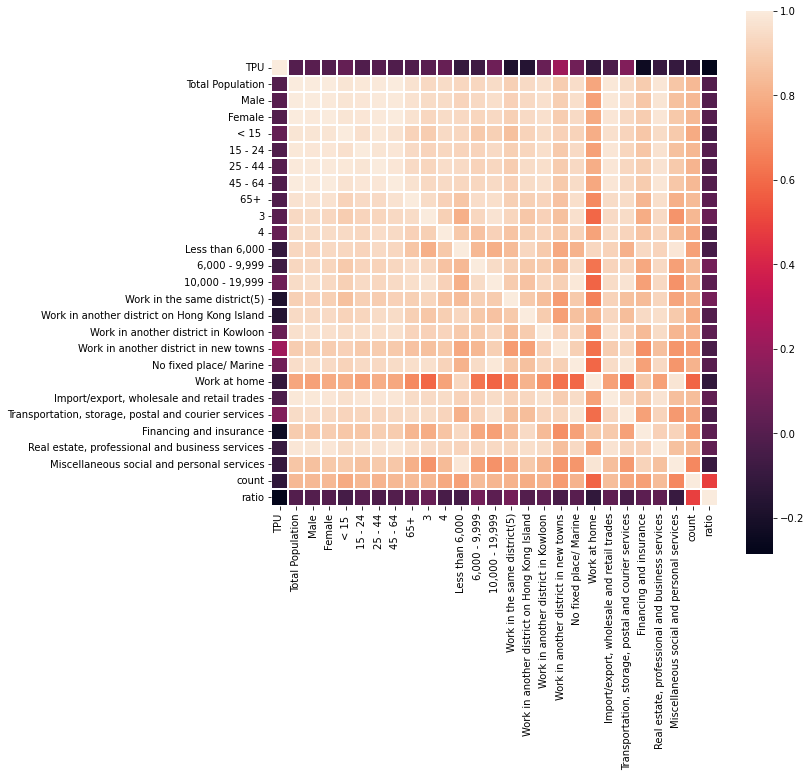

In [197]:
p_value = temp_merge.corr(method=pearsonr_pval)
p_value[p_value['ratio']<0.05]
plt.figure(figsize=(10, 10))
sns.heatmap(temp_merge.corr(method='spearman'), linewidths=0.1, vmax=1.0, square=True, linecolor='white')

In [278]:
case_tpu = pd.read_csv('TPU/covid_case_TPU.csv', index_col=0)

In [279]:
for i in range(0,len(case_tpu)):
    if('months' in str(case_tpu.iloc[i].Age)):
        k = case_tpu.iloc[i].Age.split(' ')
        months = int(k[0])
        case_tpu.loc[i,'Age'] = months/12
        print(i,months)
    elif('month' in str(case_tpu.iloc[i].Age)):
        k = case_tpu.iloc[i].Age.split(' ')
        months = int(k[0])
        case_tpu.loc[i,'Age'] = months/12
        print(i,months)
    elif('Months' in str(case_tpu.iloc[i].Age)):
        k = case_tpu.iloc[i].Age.split(' ')
        months = int(k[0])
        case_tpu.loc[i,'Age'] = months/12
        print(i,months)
    elif('Month' in str(case_tpu.iloc[i].Age)):
        k = case_tpu.iloc[i].Age.split(' ')
        months = int(k[0])
        case_tpu.loc[i,'Age'] = months/12
        print(i,months)
    elif('days' in str(case_tpu.iloc[i].Age)):
        k = case_tpu.iloc[i].Age.split(' ')
        days = int(k[0])
        case_tpu.loc[i,'Age'] = days/365
        print(i,days)

11533 12


In [280]:
case_tpu.to_csv('TPU/covid_case_TPU.csv')

In [281]:
df= case_tpu[(~pd.isna(case_tpu['TPU'])) & (~pd.isna(case_tpu['Total Population']))]

In [265]:
temp_merge['count'].sum()

10604.0

In [271]:
for i in temp_merge['TPU'].unique():
    l1 = temp_merge.loc[temp_merge['TPU']==i,'count'].values
    l2 = len(df[df['TPU']==i])
    if(l1!=l2):
        print(l1,l2,i)

[56.] 57 113.0
[68.] 69 323.0


In [285]:
df= df[df['Age']!='Pending']

In [289]:
df['Age'] = df['Age'].astype('float')

In [295]:
df = df[df['Sex']!='Pending']

In [297]:
df.to_csv('TPU/covid_case_TPU_selected.csv',index=0)

In [7]:
tpu_count = pd.read_csv('TPU/covid_TPU_count_selected.csv', index_col=0)

In [298]:
for i in tpu_count['TPU'].unique():
    l = len(df[df['TPU']==i])
    tpu_count.loc[tpu_count['TPU']==i,'count'] = l

In [303]:
tpu_count['count'].sum()

10603

In [305]:
tpu_count.to_csv('TPU/covid_TPU_count_selected.csv', index=0)

In [307]:
tpu_count['count'].describe()

count    215.000000
mean      49.316279
std       75.920473
min        1.000000
25%        7.000000
50%       26.000000
75%       63.500000
max      708.000000
Name: count, dtype: float64

In [318]:
df['Sex'] = df['Sex'].str.lower()

In [319]:
df.to_csv('TPU/covid_case_TPU_selected.csv',index=0)

In [321]:
sum(df['Sex']=='male')

5085

In [323]:
tpu_count['ratio'] = tpu_count['count']/tpu_count['Total Population']

In [324]:
p_value = tpu_count.corr(method=pearsonr_pval)
p_value[p_value['ratio']<0.05]

,TPU,Total Population,Male,Female,< 15,15 - 24,25 - 44,45 - 64,65+,3,...,Work in another district in new towns,No fixed place/ Marine,Work at home,"Import/export, wholesale and retail trades","Transportation, storage, postal and courier services",Financing and insurance,"Real estate, professional and business services",Miscellaneous social and personal services,count,ratio
TPU,1.000000,6.621469e-01,6.209566e-01,6.994954e-01,4.782293e-01,6.087708e-01,6.353933e-01,6.609513e-01,9.249352e-01,7.485872e-01,...,1.345858e-01,5.661908e-01,4.402051e-01,9.046248e-01,1.364594e-01,5.703514e-02,7.861834e-01,5.528635e-01,1.062051e-01,9.392071e-05
Work at home,0.440205,7.641494e-31,6.136738e-29,1.455484e-32,1.423780e-33,1.397734e-25,5.219430e-34,6.628411e-31,3.423534e-24,1.767605e-21,...,6.629056e-17,4.739669e-18,1.000000e+00,2.252760e-31,3.191821e-18,1.200199e-70,1.456730e-32,8.190081e-126,3.538460e-10,2.462811e-02
Miscellaneous social and personal services,0.552864,5.915081e-59,8.875298e-56,8.338600e-62,7.493671e-62,1.129569e-48,1.910425e-63,3.531853e-59,1.900233e-47,2.784927e-43,...,1.783488e-31,1.439617e-37,8.190081e-126,3.455732e-59,6.082156e-36,3.266798e-86,1.540605e-61,1.000000e+00,1.735694e-18,4.507907e-02
count,0.106205,1.036689e-36,9.413401e-37,1.346099e-36,3.465555e-36,6.576050e-34,1.169814e-35,4.563464e-35,4.690995e-39,7.422060e-41,...,1.377205e-20,1.701924e-37,3.538460e-10,9.265798e-37,1.734453e-32,9.838858e-17,2.326644e-36,1.735694e-18,1.000000e+00,5.220310e-07


In [326]:
p_value = tpu_count.corr(method=pearsonr_pval)
p_value[p_value['count']<0.05]

,TPU,Total Population,Male,Female,< 15,15 - 24,25 - 44,45 - 64,65+,3,...,Work in another district in new towns,No fixed place/ Marine,Work at home,"Import/export, wholesale and retail trades","Transportation, storage, postal and courier services",Financing and insurance,"Real estate, professional and business services",Miscellaneous social and personal services,count,ratio
Total Population,0.662147,1.000000e+00,0.000000e+00,0.000000e+00,2.236478e-184,1.600282e-156,4.022195e-230,5.003102e-241,8.831989e-148,8.140199e-152,...,5.601962e-74,1.234983e-146,7.641494e-31,2.486945e-210,1.000223e-110,6.151641e-50,5.988733e-177,5.915081e-59,1.036689e-36,0.365923
Male,0.620957,0.000000e+00,1.000000e+00,1.317620e-268,2.036062e-178,1.731034e-160,1.334679e-217,5.646111e-237,5.168386e-147,2.084933e-156,...,1.329169e-75,9.790589e-156,6.136738e-29,5.090739e-207,6.075173e-114,9.328417e-48,1.238314e-171,8.875298e-56,9.413401e-37,0.389441
Female,0.699495,0.000000e+00,1.317620e-268,1.000000e+00,1.369423e-186,1.327473e-151,1.523005e-233,1.576523e-233,6.023657e-147,1.289991e-146,...,2.357419e-72,1.203552e-138,1.455484e-32,2.275109e-207,1.788170e-107,7.711232e-52,4.895568e-179,8.338600e-62,1.346099e-36,0.346314
< 15,0.478229,2.236478e-184,2.036062e-178,1.369423e-186,1.000000e+00,1.949641e-137,1.305052e-194,5.409777e-157,1.387913e-114,1.617030e-122,...,2.815280e-70,1.458216e-122,1.423780e-33,6.198660e-163,1.440639e-98,1.555752e-50,3.410444e-137,7.493671e-62,3.465555e-36,0.265227
15 - 24,0.608771,1.600282e-156,1.731034e-160,1.327473e-151,1.949641e-137,1.000000e+00,1.049911e-136,6.506914e-152,5.907934e-104,2.552618e-115,...,4.536926e-85,1.065051e-142,1.397734e-25,4.408610e-140,4.621538e-108,2.341012e-40,7.919890e-122,1.129569e-48,6.576050e-34,0.409459
25 - 44,0.635393,4.022195e-230,1.334679e-217,1.523005e-233,1.305052e-194,1.049911e-136,1.000000e+00,4.599259e-187,8.986807e-130,3.620127e-138,...,1.231486e-70,3.747479e-130,5.219430e-34,6.656896e-203,2.167288e-106,1.373814e-54,6.800157e-167,1.910425e-63,1.169814e-35,0.340762
45 - 64,0.660951,5.003102e-241,5.646111e-237,1.576523e-233,5.409777e-157,6.506914e-152,4.599259e-187,1.000000e+00,4.886842e-136,5.120747e-145,...,8.596969e-76,7.202614e-138,6.628411e-31,1.860677e-191,1.988480e-108,7.270351e-50,5.447098e-174,3.531853e-59,4.563464e-35,0.342600
65+,0.924935,8.831989e-148,5.168386e-147,6.023657e-147,1.387913e-114,5.907934e-104,8.986807e-130,4.886842e-136,1.000000e+00,1.166939e-144,...,2.711072e-57,1.188700e-124,3.423534e-24,7.371875e-133,2.054458e-92,8.311460e-42,2.178538e-137,1.900233e-47,4.690995e-39,0.555859
3,0.748587,8.140199e-152,2.084933e-156,1.289991e-146,1.617030e-122,2.552618e-115,3.620127e-138,5.120747e-145,1.166939e-144,1.000000e+00,...,1.208454e-64,1.972589e-141,1.767605e-21,1.342305e-147,1.911891e-97,8.590789e-41,2.326646e-138,2.784927e-43,7.422060e-41,0.716392
4,0.287444,4.695259e-113,4.116293e-112,3.279690e-113,3.594222e-110,2.272712e-112,4.292382e-117,6.140969e-112,1.371086e-78,7.103624e-84,...,5.614382e-74,6.438609e-85,5.165343e-34,9.050980e-112,2.466871e-85,1.327630e-53,1.289493e-99,1.088095e-57,1.125470e-23,0.184735


In [ ]:
covid_TPU_count_selected.csvplt.figure(figsize=(10, 10))
sns.heatmap(temp_merge.corr(method='spearman'), linewidths=0.1, vmax=1.0, square=True, linecolor='white')

<AxesSubplot:>

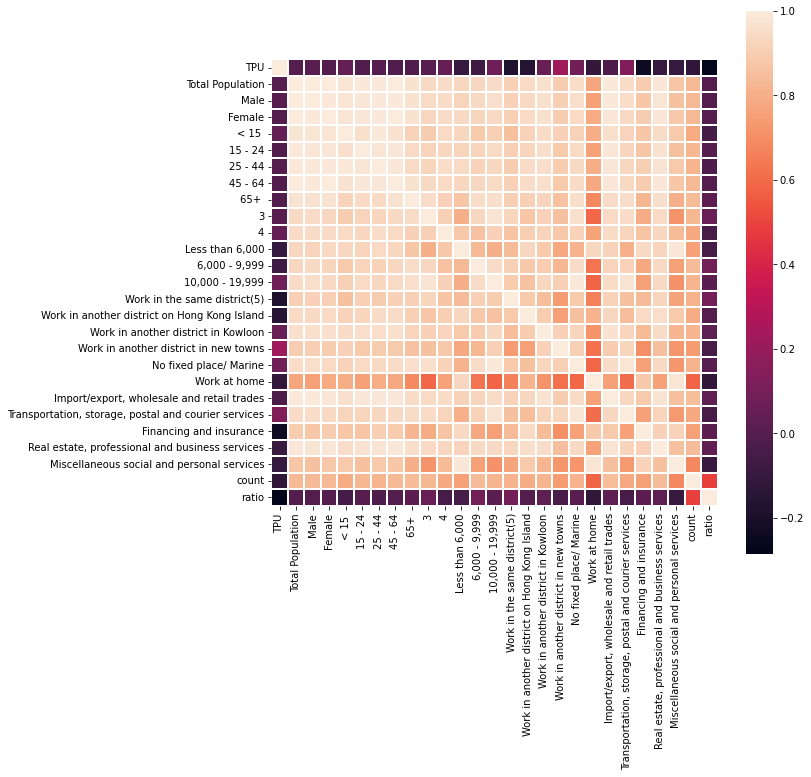

In [325]:
plt.figure(figsize=(10, 10))
sns.heatmap(tpu_count.corr(method='spearman'), linewidths=0.1, vmax=1.0, square=True, linecolor='white')

In [333]:
for i in tpu_count['TPU'].unique():
    l1 = len(df[(df['TPU']==i) & (df['Sex']=='female')])
    l2 = len(df[(df['TPU']==i) & (df['Sex']=='male')])
    tpu_count.loc[tpu_count['TPU']==i,'count_female'] = l1
    tpu_count.loc[tpu_count['TPU']==i,'count_male'] = l2
    tpu_count.loc[tpu_count['TPU']==i,'count_female_ratio'] = l1/tpu_count.loc[tpu_count['TPU']==i,'Female'].values
    tpu_count.loc[tpu_count['TPU']==i,'count_male_ratio'] = l2/tpu_count.loc[tpu_count['TPU']==i,'Male'].values
    if((l1+l2)!=tpu_count.loc[tpu_count['TPU']==i,'count'].values):
        print(i)
    l1 = len(df[(df['TPU']==i) & (df['Age']<15)])
    l2 = len(df[(df['TPU']==i) & (df['Age']>=15) & (df['Age']<25)])
    l3 = len(df[(df['TPU']==i) & (df['Age']>=25) & (df['Age']<45)])
    l4 = len(df[(df['TPU']==i) & (df['Age']>=45) & (df['Age']<65)])
    l5 = len(df[(df['TPU']==i) & (df['Age']>=65)])
    tpu_count.loc[tpu_count['TPU']==i,'age0'] = l1
    tpu_count.loc[tpu_count['TPU']==i,'age1'] = l2
    tpu_count.loc[tpu_count['TPU']==i,'age2'] = l3
    tpu_count.loc[tpu_count['TPU']==i,'age3'] = l4
    tpu_count.loc[tpu_count['TPU']==i,'age4'] = l5
    if((l1+l2+l3+l4+l5)!=tpu_count.loc[tpu_count['TPU']==i,'count'].values):
        print(i)

In [343]:
tpu_count.to_csv('TPU/covid_TPU_count_selected.csv', index=0)

In [340]:
tpu_count.columns

Index(['TPU', 'Total Population', 'Male', 'Female', '< 15 ', '15 - 24',
       '25 - 44', '45 - 64', '65+ ', 'Public rental \nhousing',
       'Subsidised home \nownership housing', 'Private permanent \nhousing',
       'Non-domestic \nhousing', 'Temporary housing', '1', '2', '3', '4', '5',
       '6 and over', 'Without exclusively used rooms', 'Less than 6,000',
       '6,000 - 9,999', '10,000 - 19,999', '20,000 - 29,999',
       '30,000 - 39,999', '40,000 - 59,999', '60,000 and over',
       'Work in the same district(5)',
       'Work in another district on Hong Kong Island',
       'Work in another district in Kowloon',
       'Work in another district in new towns',
       'Work in another district in other areas in the New Territories',
       'No fixed place/ Marine', 'Work at home', 'Places outside Hong Kong',
       'Manufacturing', 'Construction',
       'Import/export, wholesale and retail trades',
       'Transportation, storage, postal and courier services',
       'Accomm

In [6]:
tpu_count['age0_ratio'] = tpu_count['age0']/tpu_count['< 15 ']
tpu_count['age1_ratio'] = tpu_count['age1']/tpu_count['15 - 24']
tpu_count['age2_ratio'] = tpu_count['age2']/tpu_count['25 - 44']
tpu_count['age3_ratio'] = tpu_count['age3']/tpu_count['45 - 64']
tpu_count['age4_ratio'] = tpu_count['age4']/tpu_count['65+ ']

KeyError: 'age0'

<AxesSubplot:>

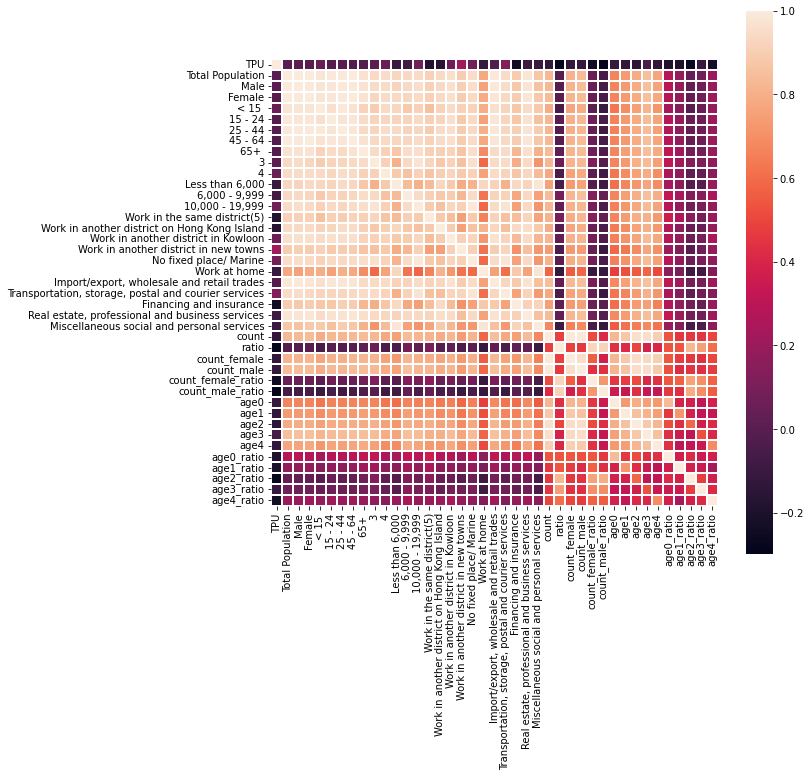

In [344]:
plt.figure(figsize=(10, 10))
sns.heatmap(tpu_count.corr(method='spearman'), linewidths=0.1, vmax=1.0, square=True, linecolor='white')

In [353]:
p_value = tpu_count.corr(method=pearsonr_pval)
p_value[p_value['age4_ratio']<0.05]

,TPU,Total Population,Male,Female,< 15,15 - 24,25 - 44,45 - 64,65+,3,...,age0,age1,age2,age3,age4,age0_ratio,age1_ratio,age2_ratio,age3_ratio,age4_ratio
TPU,1.000000,6.621469e-01,6.209566e-01,6.994954e-01,4.782293e-01,6.087708e-01,6.353933e-01,6.609513e-01,9.249352e-01,7.485872e-01,...,1.064571e-01,1.462250e-01,4.653090e-02,3.555905e-01,7.448855e-02,2.534409e-02,2.845211e-02,5.619208e-05,8.315652e-02,5.858591e-05
count,0.106205,1.036689e-36,9.413401e-37,1.346099e-36,3.465555e-36,6.576050e-34,1.169814e-35,4.563464e-35,4.690995e-39,7.422060e-41,...,1.827255e-80,2.347777e-89,3.804768e-101,1.195252e-153,4.668891e-73,9.175620e-03,1.233604e-01,1.396090e-04,8.597639e-08,1.006150e-04
ratio,0.000094,3.659230e-01,3.894412e-01,3.463137e-01,2.652274e-01,4.094586e-01,3.407618e-01,3.426001e-01,5.558590e-01,7.163921e-01,...,1.023575e-08,6.953784e-06,2.836716e-11,1.496489e-04,2.114969e-03,5.682884e-42,7.309787e-31,6.834756e-88,2.173515e-47,3.929706e-14
count_female,0.084163,1.049929e-35,9.359843e-36,1.375619e-35,4.922750e-35,6.844043e-33,1.596562e-34,2.954637e-34,3.016622e-38,2.430639e-40,...,7.195726e-78,1.326441e-85,9.376329e-105,1.650081e-137,1.881767e-70,8.041889e-03,1.204262e-01,7.896505e-05,7.059117e-08,9.663623e-05
count_male,0.139590,7.604253e-37,7.079049e-37,9.669952e-37,1.641649e-36,3.624478e-34,5.526191e-36,4.788170e-35,7.193737e-39,2.875970e-40,...,1.656882e-79,9.501928e-89,8.487662e-92,1.341813e-152,8.212371e-73,1.137575e-02,1.303526e-01,2.952909e-04,1.434818e-07,1.229817e-04
count_female_ratio,0.000206,5.453508e-01,5.835854e-01,5.130465e-01,4.073475e-01,5.890835e-01,5.050715e-01,5.213512e-01,7.813887e-01,9.951457e-01,...,4.106739e-09,5.483480e-06,5.258080e-12,8.230293e-05,1.483473e-03,3.449405e-42,1.535355e-29,3.810028e-70,1.322065e-44,2.428958e-12
count_male_ratio,0.000093,1.895889e-01,1.975763e-01,1.830762e-01,1.359706e-01,2.259007e-01,1.788307e-01,1.737187e-01,3.010409e-01,3.768921e-01,...,3.881668e-07,4.959101e-05,6.377951e-09,1.025442e-03,7.772053e-03,1.365879e-34,3.397919e-27,5.614162e-78,1.713707e-41,2.160920e-14
age0,0.106457,1.503521e-19,1.523973e-19,1.600144e-19,5.852870e-20,2.629284e-18,1.257292e-19,3.200670e-18,1.782678e-20,1.993104e-20,...,1.000000e+00,1.683840e-64,5.448735e-75,3.301744e-61,6.385074e-34,2.473944e-06,5.033048e-02,7.059858e-06,4.312959e-08,6.271978e-04
age1,0.146225,1.302738e-25,1.577474e-25,1.223782e-25,5.042981e-26,4.564509e-25,1.695432e-24,2.919778e-24,3.013533e-27,8.166381e-28,...,1.683840e-64,1.000000e+00,1.516513e-64,1.881531e-77,9.261520e-38,1.536856e-02,6.833334e-03,4.918187e-04,1.497025e-05,1.063182e-02
age2,0.046531,3.091131e-27,2.420838e-27,4.296610e-27,6.336972e-27,1.812896e-25,1.844240e-27,6.375985e-26,1.972926e-27,2.029562e-29,...,5.448735e-75,1.516513e-64,1.000000e+00,4.294952e-69,2.035654e-35,2.177884e-04,2.042127e-02,4.133103e-10,3.499967e-09,2.993523e-04


In [8]:
tpu_count.corr(method='spearman')

,Total Population,Male,Female,< 15,15 - 24,25 - 44,45 - 64,65+,3,4,...,age0,age1,age2,age3,age4,age0_ratio,age1_ratio,age2_ratio,age3_ratio,age4_ratio
Total Population,1.000000,0.998238,0.998709,0.977839,0.985430,0.993072,0.995345,0.966939,0.939480,0.948230,...,0.669187,0.731385,0.790918,0.849849,0.769578,0.286130,0.179688,0.040996,0.074139,0.202148
Male,0.998238,1.000000,0.994819,0.976161,0.984392,0.991613,0.992887,0.966803,0.947675,0.949172,...,0.669464,0.729968,0.790534,0.848283,0.765646,0.290465,0.179326,0.041304,0.073856,0.193325
Female,0.998709,0.994819,1.000000,0.977813,0.984418,0.992055,0.995052,0.965166,0.931183,0.945609,...,0.666617,0.731230,0.790562,0.849602,0.773176,0.280403,0.180546,0.043300,0.073103,0.210296
< 15,0.977839,0.976161,0.977813,1.000000,0.962965,0.984946,0.965205,0.916393,0.895008,0.942406,...,0.625997,0.690853,0.751256,0.813303,0.725053,0.224083,0.141016,-0.000249,0.051089,0.179157
15 - 24,0.985430,0.984392,0.984418,0.962965,1.000000,0.976667,0.982057,0.944463,0.922687,0.930674,...,0.662474,0.728109,0.785665,0.840130,0.766013,0.293534,0.173606,0.053478,0.068460,0.214113
25 - 44,0.993072,0.991613,0.992055,0.984946,0.976667,1.000000,0.983604,0.943910,0.926763,0.952651,...,0.658042,0.716639,0.783127,0.839591,0.749370,0.270151,0.167419,0.027702,0.069982,0.188360
45 - 64,0.995345,0.992887,0.995052,0.965205,0.982057,0.983604,1.000000,0.966570,0.937432,0.942323,...,0.663762,0.729138,0.788122,0.846539,0.770912,0.285483,0.179070,0.045743,0.062572,0.208124
65+,0.966939,0.966803,0.965166,0.916393,0.944463,0.943910,0.966570,1.000000,0.945080,0.911892,...,0.674813,0.741522,0.786395,0.844065,0.784041,0.310305,0.213271,0.071923,0.090521,0.191436
3,0.939480,0.947675,0.931183,0.895008,0.922687,0.926763,0.937432,0.945080,1.000000,0.909422,...,0.665459,0.729333,0.806775,0.834367,0.750091,0.316785,0.208599,0.132550,0.112181,0.176075
4,0.948230,0.949172,0.945609,0.942406,0.930674,0.952651,0.942323,0.911892,0.909422,1.000000,...,0.627046,0.689767,0.753402,0.790565,0.691990,0.252544,0.163459,0.024736,0.036167,0.137288
